In [15]:
import pandas as pd

boston = pd.read_csv('housing.csv')
print(boston.head())

median_value = boston['MEDV']
print(median_value.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64


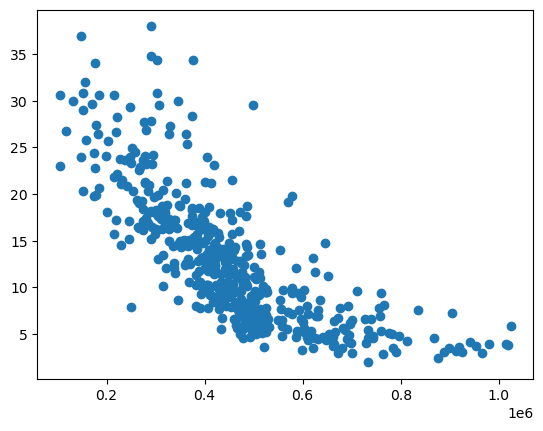

In [3]:
import matplotlib.pyplot as plt

house_price = boston['MEDV']
lstat = boston['LSTAT']
plt.scatter(house_price, lstat)

Steigung (coef_): [-17759.04832737]
Y-Achsenabschnitt (intercept_): 684138.4930684497


/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


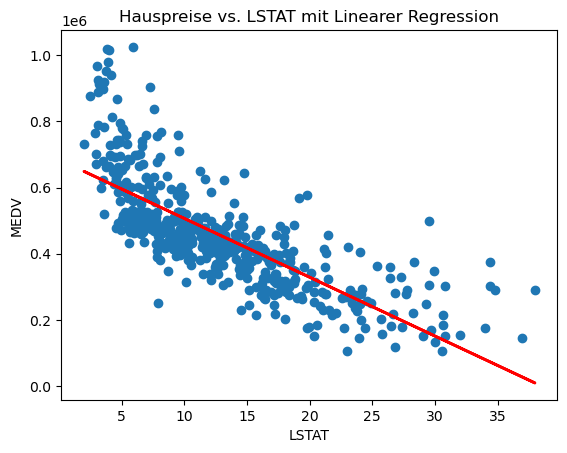

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

simple_model = LinearRegression()
simple_model.fit(np.array(lstat).reshape(-1,1), median_value.tolist())

print("Steigung (coef_):", simple_model.coef_)
print("Y-Achsenabschnitt (intercept_):", simple_model.intercept_)

plt.scatter(boston['LSTAT'], median_value)
plt.plot(boston['LSTAT'], simple_model.predict(boston[['LSTAT']]), color='red', linewidth=2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Hauspreise vs. LSTAT mit Linearer Regression')
plt.show()

# 14)
# Nein, der Zusammenhang scheint logarithmisch zu sein


In [8]:
# 15)

r_square = simple_model.score(np.array(lstat).reshape(-1, 1), median_value.tolist())
print("R^2 = " + str(r_square))

# 16)


R^2 = 0.5786189401388357


In [14]:
# 17)
X = boston[['LSTAT', 'RM']]
y = median_value

simple_model = LinearRegression()
simple_model.fit(X, y)

# R^2 has improved from 0.579 to 0.664
r_square = simple_model.score(X, y)
print("R^2 = " + str(r_square))

R^2 = 0.6644235495547175


In [20]:
# 18)
X = boston[['LSTAT', 'RM', 'PTRATIO']]
y = boston['MEDV']

simple_model = LinearRegression()
simple_model.fit(X, y)

# R^2 has improved from 0.664 to 0.718
r_square = simple_model.score(X, y)
print("R^2 = " + str(r_square))

R^2 = 0.7176275212982738


In [29]:
# 19)
from sklearn.model_selection import train_test_split

X = boston[['LSTAT', 'RM', 'PTRATIO']]
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

simple_model = LinearRegression()
simple_model.fit(X=X_train, y=y_train)

# 
r_square = simple_model.score(X_test, y_test)
print("R^2 = " + str(r_square))

R^2 = 0.6574622113312862
